<a href="https://colab.research.google.com/github/NewKanvas/Projeto-5/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Módulo 5 – Criptomoedas***

#### ***SOBRE O PROJETO***

`Esse é um projeto integrador, nós vamos utilizar
todas as ferramentas e conhecimentos trabalhados ao
longo do curso. `

**CONTEXTO**

Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.
Por isso, você e seu squad foram escalados por uma corretora financeira para
realizar uma análise exploratória relacionada à série histórica dos valores de
criptomoedas.

##### ***O QUE É PARA FAZER?***

Realizar uma análise exploratória histórica dos valores de
criptomoedas.
As fontes de dados que serão utilizadas no projeto estão
disponíveis no [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).



##### ***COMO FAZER?***

**DETALHES DO PROJETO**

A análise deverá responder às seguintes perguntas:
1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

### ***Importando as bibliotecas***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt # pip install matplotlib
# import plotly.express as px #  pip install --upgrade plotly

### **Tratando e Carregando Dados**

#### **Carregando Datasets**
> 23 Datasets disponibilizados pelo link do Kaggle

In [2]:
# Lendo os datasets
aave = pd.read_csv('https://raw.githubusercontent.com/NewKanvas/Projeto-5/main/Data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_XRP.csv')


#### ***Unindo todos os datasets em 1 dataframe.***

In [3]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)


#### ***Limpeza dos Dados***

In [4]:
#Convertendo para conter somente a Data
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date 

In [5]:
# Removendo Colunas que não utilizaremos
del cripto['SNo']
del cripto['Symbol']

In [6]:
## Traduzindo Colunas
traducao = {"Name": "Moeda",
            "Date": "Data",
            "High": "Alta",
            "Low": "Baixa",
            "Open": "Abertura",
            "Close": "Fechamento",
            "Volume": "Volume",
            "Marketcap": "Marketcap",} # Gerando dicionario para tradução
cripto.rename(columns=traducao, inplace=True)# Renomeando

In [7]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [8]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

## Formantando valores

In [9]:
format = lambda x: '%.2f' % x # %x (aplica no x)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].astype(float) # Reformatando os valores para float

C:\Users\Cassio\AppData\Local\Temp\ipykernel_7480\4245637394.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)


In [10]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.67,0.63,0.66,0.66,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.68,0.64,0.66,0.67,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.71,0.67,0.67,0.69,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.70,0.65,0.70,0.65,2.076373e+09,3.019395e+10


In [11]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### **Selecionando 10 criptomoedas:**

#### Agrupando os valores das moedas

In [12]:
# Criando copia Formatada do Dataframe Original
cripto_form = cripto.set_index(['Moeda', 'Data']).unstack(level=0) 
# Selecionando o valor de Fechamento
cripto_grp = cripto_form['Fechamento'] # Pode mudar para selecionar outro valor

cripto_grp

Moeda,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Data,,,,,,,,,,,,,,,,,,,,,
2013-04-29,NaN,NaN,144.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,139.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,116.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,105.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,97.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.95,287.42,33897.05,1.39,18.28,11.76,0.11,0.25,3.93,2150.04,...,0.13,15.34,34.02,0.26,0.07,1.0,1.0,18.24,33824.26,0.66
2021-07-03,259.66,298.24,34668.55,1.41,18.54,11.82,0.12,0.25,4.05,2226.11,...,0.13,15.55,34.48,0.26,0.07,1.0,1.0,19.52,34676.99,0.67
2021-07-04,277.04,307.73,35287.78,1.46,19.26,12.26,0.12,0.25,4.06,2321.72,...,0.14,16.01,34.31,0.27,0.07,1.0,1.0,20.77,35289.76,0.69


#### Gerando as medias das Moedas Selecionadas

In [13]:
cripto_mean = cripto_grp.mean().sort_values(ascending=False) # Verificando as maiores medias de fechamento.

cripto_mean

Moeda
Wrapped Bitcoin    17086.573806
Bitcoin             6711.290425
Ethereum             383.910727
Aave                 255.525782
Monero                74.134712
Binance Coin          52.250319
Litecoin              49.279017
Polkadot              18.143031
Uniswap               17.077329
Solana                10.471615
Cosmos                 6.768154
Chainlink              6.308527
EOS                    4.624175
USD Coin               1.003383
Tether                 1.000475
IOTA                   0.729340
Cardano                0.256179
XRP                    0.235309
NEM                    0.124537
Stellar                0.100677
Crypto.com Coin        0.081743
TRON                   0.032414
Dogecoin               0.012659
dtype: float64

#### Filtrando as Moedas

In [14]:
cripto_mean = cripto_mean.drop('Wrapped Bitcoin') # Removendo a Wrapped Bitcoin
cripto_mean = cripto_mean.head(10) # Pegando as 10 maiores
cripto_mean

Moeda
Bitcoin         6711.290425
Ethereum         383.910727
Aave             255.525782
Monero            74.134712
Binance Coin      52.250319
Litecoin          49.279017
Polkadot          18.143031
Uniswap           17.077329
Solana            10.471615
Cosmos             6.768154
dtype: float64

In [15]:
cripto_top10 = cripto_mean.index.tolist() # Pegando os Indices e colocando em uma lista
cripto_top10

['Bitcoin',
 'Ethereum',
 'Aave',
 'Monero',
 'Binance Coin',
 'Litecoin',
 'Polkadot',
 'Uniswap',
 'Solana',
 'Cosmos']

#### Criando Novo Dataframe das Moedas selecionadas

In [16]:
criptocopy = cripto[cripto['Moeda'].isin(cripto_top10)].reset_index(drop=True) # Filtrando no DataFrame Original para pegar somente as moedas selecionadas
criptocopy

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,18.24,16.98,17.83,18.24,3.070457e+08,1.049364e+10
14366,Uniswap,2021-07-03,19.52,17.85,18.23,19.52,3.448554e+08,1.146609e+10
14367,Uniswap,2021-07-04,21.48,18.95,19.48,20.77,5.404909e+08,1.219861e+10
14368,Uniswap,2021-07-05,20.87,19.18,20.77,20.10,5.452744e+08,1.180130e+10


In [17]:
criptocopy['Moeda'].unique() # Verificando as moedas selecionadas

array(['Aave', 'Binance Coin', 'Bitcoin', 'Cosmos', 'Ethereum',
       'Litecoin', 'Monero', 'Polkadot', 'Solana', 'Uniswap'],
      dtype=object)

In [18]:
criptocopy.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### **Criando CSVs**

In [19]:
criptocopy.to_csv('../Data/criptomoedas.csv', index=False) # Salvando tabela filtrada em csv
cripto.to_csv('../Data/cripto.csv', index=False) # Salvando tabela em csv

## **Analisando Correlação**

In [20]:
criptoanlys =criptocopy.groupby(['Moeda', 'Data'])['Fechamento'].sum().unstack().fillna(0)
criptoanlys.T

Moeda,Aave,Binance Coin,Bitcoin,Cosmos,Ethereum,Litecoin,Monero,Polkadot,Solana,Uniswap
Data,,,,,,,,,,
2013-04-29,0.00,0.00,144.54,0.00,0.00,4.38,0.00,0.00,0.00,0.00
2013-04-30,0.00,0.00,139.00,0.00,0.00,4.30,0.00,0.00,0.00,0.00
2013-05-01,0.00,0.00,116.99,0.00,0.00,3.80,0.00,0.00,0.00,0.00
2013-05-02,0.00,0.00,105.21,0.00,0.00,3.37,0.00,0.00,0.00,0.00
2013-05-03,0.00,0.00,97.75,0.00,0.00,3.04,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.95,287.42,33897.05,11.76,2150.04,136.94,211.35,15.34,34.02,18.24
2021-07-03,259.66,298.24,34668.55,11.82,2226.11,140.28,214.75,15.55,34.48,19.52
2021-07-04,277.04,307.73,35287.78,12.26,2321.72,144.91,219.84,16.01,34.31,20.77


In [21]:
criptoanlys.T.corr()

Moeda,Aave,Binance Coin,Bitcoin,Cosmos,Ethereum,Litecoin,Monero,Polkadot,Solana,Uniswap
Moeda,,,,,,,,,,
Aave,1.000000,0.888885,0.904269,0.904984,0.888439,0.630658,0.570616,0.969241,0.856316,0.972321
Binance Coin,0.888885,1.000000,0.846923,0.884532,0.896659,0.652883,0.618969,0.909625,0.960360,0.948143
Bitcoin,0.904269,0.846923,1.000000,0.930998,0.914318,0.812679,0.761104,0.921036,0.772803,0.902064
Cosmos,0.904984,0.884532,0.930998,1.000000,0.842983,0.674179,0.591878,0.928832,0.806987,0.913786
Ethereum,0.888439,0.896659,0.914318,0.842983,1.000000,0.847565,0.834097,0.870218,0.880085,0.893770
Litecoin,0.630658,0.652883,0.812679,0.674179,0.847565,1.000000,0.960068,0.634801,0.573416,0.634006
Monero,0.570616,0.618969,0.761104,0.591878,0.834097,0.960068,1.000000,0.576550,0.564720,0.585918
Polkadot,0.969241,0.909625,0.921036,0.928832,0.870218,0.634801,0.576550,1.000000,0.845631,0.980063
Solana,0.856316,0.960360,0.772803,0.806987,0.880085,0.573416,0.564720,0.845631,1.000000,0.902739


## Montando grafico de correlação

In [22]:
# Importando bibliotecas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn

Text(0.5, 1.0, 'Correlação entre os valores das moedas pelo valor de Fechamento')

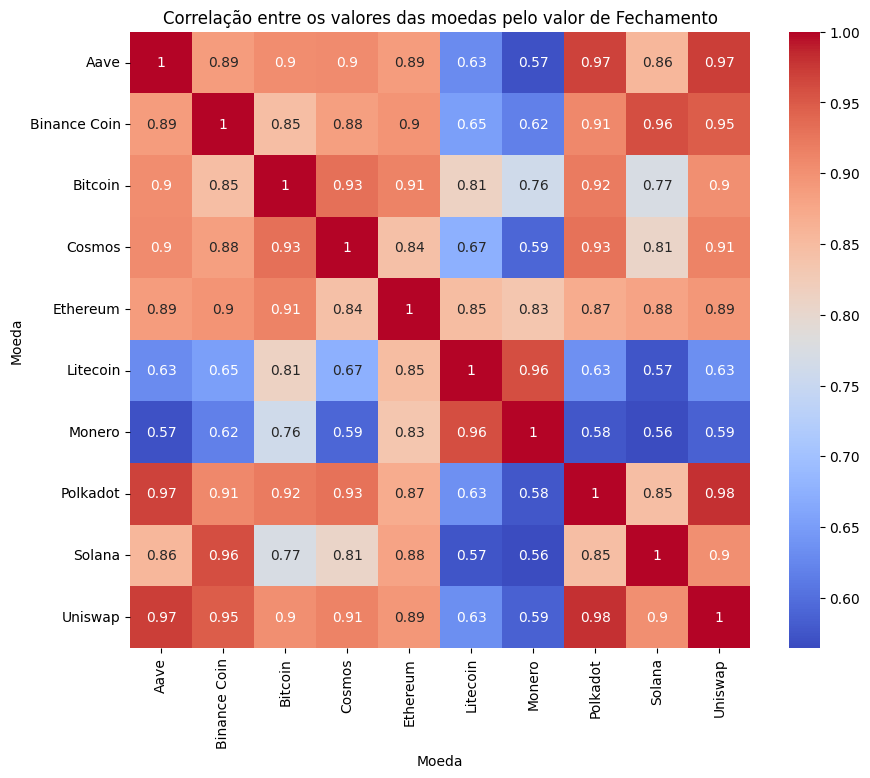

In [23]:
# Pergunta 7 - Existe correlação entre os valores para todas as criptomoedas?

plt.figure(figsize=(10, 8))
sns.heatmap(criptoanlys.T.corr(), annot=True, cmap="coolwarm")
plt.title('Correlação entre os valores das moedas pelo valor de Fechamento')

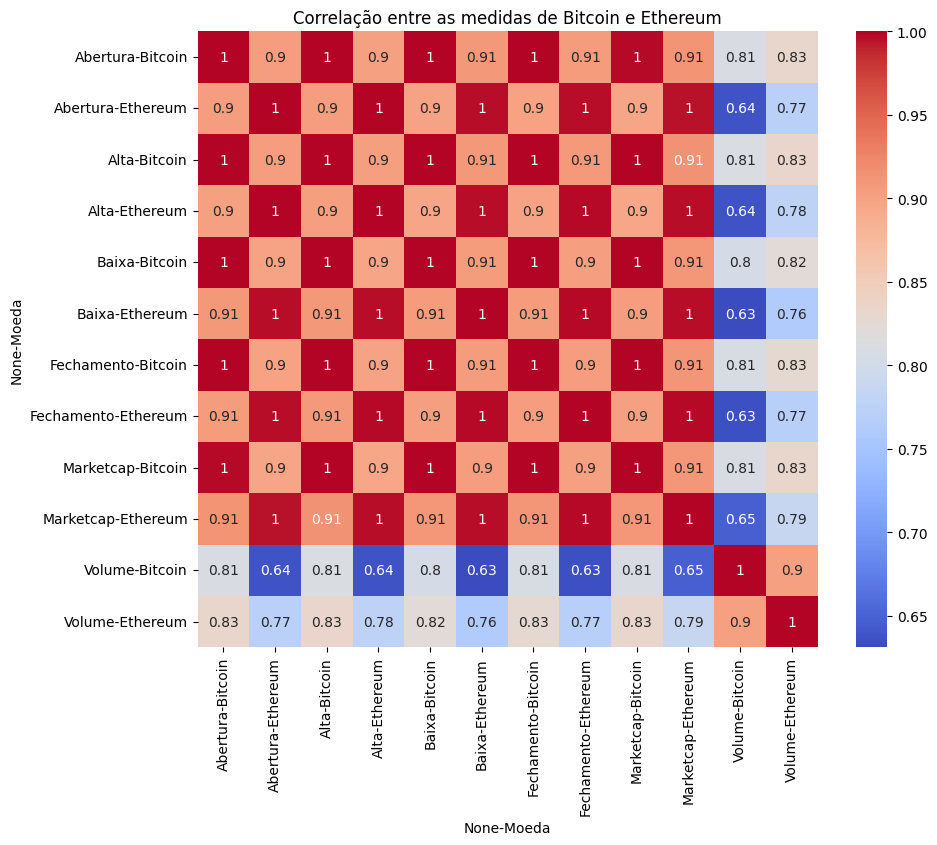

In [24]:
# Selecionar as moedas desejadas
moeda1 = 'Bitcoin'
moeda2 = 'Ethereum'

# Calcular a matriz de correlação
criptoanlys2 = criptocopy[(criptocopy['Moeda'] == moeda1) | (criptocopy['Moeda'] == moeda2)].pivot_table(index='Data', columns='Moeda', values=['Abertura', 'Fechamento', 'Alta', 'Baixa', 'Volume', 'Marketcap'], aggfunc='sum')
correlation_matrix = criptoanlys2.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title(f'Correlação entre as medidas de {moeda1} e {moeda2}')
plt.show()
